# Throughput can be un-measured
75, 76

In [1]:
import os
import matplotlib.pyplot as plt
import sys
from pprint import PrettyPrinter

pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
project_dir = globals()["_dh"][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, "..", "..", "..", "..")))

from experiments.utils.constants import NODE_PROFILING_RESULTS_PATH
from experiments.utils.parser import Parser

In [2]:
series = 75
experiment_id = 1
config_key_mapper = "key_config_mapper.csv"
model_name = "resnet-human"
series_path = os.path.join(NODE_PROFILING_RESULTS_PATH, "series", str(series))
loader = Parser(
    series_path=series_path, config_key_mapper=config_key_mapper, model_name=model_name
)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

In [3]:
results.columns

Index(['experiment_id', 'client_to_model_avg',
       'client_to_model_p99', 'client_to_model_p95',
       'client_to_model_p50', 'client_to_model_var',
       'client_to_model_max', 'client_to_model_min',
       'model_latencies_avg', 'model_latencies_p99', 'model_latencies_p95',
       'model_latencies_p50', 'model_latencies_var', 'model_latencies_max',
       'model_latencies_min', 'model_to_client_avg',
       'model_to_client_p99', 'model_to_client_p95',
       'model_to_client_p50', 'model_to_client_var',
       'model_to_client_max', 'model_to_client_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p95',
       'cpu_usage_count_p50', 'cpu_usage_count_var', 'cpu_usage_count_max',
       'cpu_usage_count_min', 'cpu_usage_rate_avg', 'cpu_usage_rate_p99',
       'cpu_usage_rate_p95', 'cpu_usage_rate_p50', 'cpu_usage_rate_var',
       'cpu_usage_rate_max', 'cpu_usage_rate_min', 'cpu_throttled_cou

In [4]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config)

File name: 0.yaml
{   'benchmark_duration': 1,
    'cpu_request': ['1', '2', '4', '8'],
    'data_type': 'image',
    'max_batch_size': ['1', '2', '8', '32', '64'],
    'max_batch_time': ['1'],
    'memory_request': ['10Gi'],
    'mode': 'exponential',
    'model_variants': [   'resnet18',
                          'resnet34',
                          'resnet50',
                          'resnet101',
                          'resnet152'],
    'node_name': 'resnet-human',
    'num_interop_threads': ['1'],
    'num_threads': ['1'],
    'pipeline_name': 'video',
    'repetition': 1,
    'replicas': [1],
    'series': 75,
    'series_meta': 'all variables change for making the profiler 1,\\n cpu '
                   'type: Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz',
    'timeout': 1,
    'use_threading': 'True',
    'workload_config': {'load_duration': 60, 'loads_to_test': [1, 10, 20, 40]},
    'workload_type': 'static'}
File name: 1.yaml
{   'benchmark_duration': 1,
    'cpu_request': [

In [5]:
display(key_config_df)

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas,no_engine,mode,data_type,benchmark_duration
0,1,video,resnet-human,resnet18,1,10Gi,1,1,1,60,75,all variables change for making the profiler 1...,1,False,exponential,image,1
1,2,video,resnet-human,resnet18,1,10Gi,1,1,10,60,75,all variables change for making the profiler 1...,1,False,exponential,image,1
2,3,video,resnet-human,resnet18,1,10Gi,1,1,20,60,75,all variables change for making the profiler 1...,1,False,exponential,image,1
3,4,video,resnet-human,resnet18,1,10Gi,1,1,40,60,75,all variables change for making the profiler 1...,1,False,exponential,image,1
4,5,video,resnet-human,resnet18,2,10Gi,1,1,1,60,75,all variables change for making the profiler 1...,1,False,exponential,image,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,video,resnet-human,resnet152,4,10Gi,64,1,40,60,75,all variables change for making the profiler 1...,1,False,exponential,image,1
396,397,video,resnet-human,resnet152,8,10Gi,64,1,1,60,75,all variables change for making the profiler 1...,1,False,exponential,image,1
397,398,video,resnet-human,resnet152,8,10Gi,64,1,10,60,75,all variables change for making the profiler 1...,1,False,exponential,image,1
398,399,video,resnet-human,resnet152,8,10Gi,64,1,20,60,75,all variables change for making the profiler 1...,1,False,exponential,image,1


In [6]:
key_config_df["max_batch_size"].unique()

array([ 1,  2,  8, 32, 64])

,model_variant,max_batch_size,cpu_request,load,model_latencies_min,model_latencies_p95,cpu_usage_count_avg,model_latencies_avg,throughput_max,expected_throughput
0,resnet34,1,2,40,0.044447,0.057065,68.392142,0.048796,19.775000,17.523745
1,resnet34,2,2,40,0.072237,0.104136,56.771541,0.080850,23.720000,19.205601
2,resnet34,8,2,40,0.152317,0.345929,46.698142,0.273231,25.397849,23.126107
3,resnet34,32,2,40,0.052344,1.255966,40.370133,0.554786,26.963626,25.478393
4,resnet34,64,2,40,0.092565,2.255637,46.999355,0.487281,25.977778,28.373361


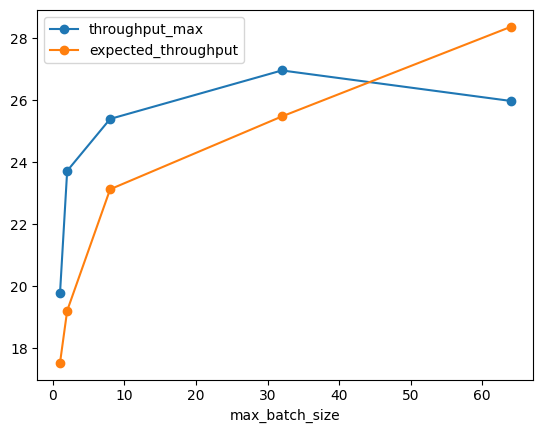

In [16]:
experiment_ids = key_config_df[
    (key_config_df["model_variant"] == "resnet34")
    & (key_config_df["cpu_request"] == 2)
    & (key_config_df["load"] == 40)
]["experiment_id"].tolist()
metadata_columns = ["model_variant", "max_batch_size", "cpu_request", "load"]
results_columns = [
    "model_latencies_min",
    "model_latencies_p95",
    "cpu_usage_count_avg",
    "model_latencies_avg",
    "throughput_max",
]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)
output["expected_throughput"] = (
    1 / output["model_latencies_p95"] * output["max_batch_size"]
)
# output.sort_values(by='throughput')
display(output)
ax = output.plot.line(
    x="max_batch_size", y=["throughput_max", "expected_throughput"], style="o-"
)
# plt.xticks(range(max(key_config_df['max_batch_size'].unique())) ., key_config_df['max_batch_size'].unique())
# ax = output.plot.line(x='max_batch_size', y=['expected_throughput'])
# ax.set_xlabel("Max Batch Size")
# ax.set_ylabel("Throughput (RPS)")
plt.savefig("throughput-resnet.png")

In [8]:
ax = output.plot.line(x="max_batch_size", y=["model_latencies_p99"], style="o-")
# ax = output.plot.line(x='max_batch_size', y=['expected_throughput'])
# ax.set_xlabel("Max Batch Size")
# ax.set_ylabel("Throughput (RPS)")
plt.savefig("latency-resnet.png")

KeyError: "None of [Index(['model_latencies_p99'], dtype='object')] are in the [columns]"